# Clasificación de la especie *Iris Setosa*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import tensorflow as tf
session = tf.Session()

/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Carga y manipulación de datos

In [2]:
iris = datasets.load_iris()
binary_target = np.array([1.0 if x == 0 else 0.0 for x in iris.target])
iris_2d = np.array([[x[2], x[3]] for x in iris.data])

### Declarar variables

In [26]:
batch_size = 20
x1_data = tf.placeholder(shape = [None, 1], dtype = tf.float32)
x2_data = tf.placeholder(shape = [None, 1], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)

### Crear el modelo
$$x_2 = Ax_1+b \Rightarrow x_2-Ax_1-b=0$$

In [40]:
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [41]:
my_mult = tf.matmul(x2_data, A)
my_add = tf.add(my_mult, b)
my_prediction = tf.subtract(x1_data, my_add)

### Función de pérdidas y propagación hacia atrás

In [42]:
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=my_prediction, labels=y_target)
my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)
train_step = my_optimizer.minimize(xentropy)

### Inicializar las variables

In [43]:
init = tf.global_variables_initializer()
session.run(init)

## Entrenar el modelo

In [44]:
for i in range(1000):
    rand_idx = np.random.choice(len(iris_2d), size=batch_size)
    rand_x = iris_2d[rand_idx]
    rand_x1 = np.array([[x[0]] for x in rand_x])
    rand_x2 = np.array([[x[1]] for x in rand_x])
    rand_y = np.array([[y] for y in binary_target[rand_idx]])
    session.run(train_step, feed_dict={x1_data:rand_x1, x2_data:rand_x2, y_target:rand_y})
    if(i+1)%100==0:
        print('Paso #'+str(i+1)+", A="+str(session.run(A))+", b ="+str(session.run(b)))

Paso #100, A=[[7.285269]], b =[[-2.2866375]]
Paso #200, A=[[8.647172]], b =[[-3.4601538]]
Paso #300, A=[[9.582458]], b =[[-4.157134]]
Paso #400, A=[[10.128266]], b =[[-4.7171583]]
Paso #500, A=[[10.6830845]], b =[[-5.098879]]
Paso #600, A=[[11.158635]], b =[[-5.3337417]]
Paso #700, A=[[11.464624]], b =[[-5.6964493]]
Paso #800, A=[[11.789551]], b =[[-5.9467206]]
Paso #900, A=[[12.062026]], b =[[-6.17947]]
Paso #1000, A=[[12.368184]], b =[[-6.3189073]]


### Modelo final

In [45]:
[[slope]] = session.run(A)
[[intercept]] = session.run(b)

#### Representación de la separación

In [46]:
x = np.linspace(0,3,num = 100)
abline_values = []
for i in x:
    abline_values.append(slope*i+intercept)
    
setosa_x = [a[1] for i,a in enumerate(iris_2d) if binary_target[i]==1]
setosa_y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i]==1]

no_setosa_x = [a[1] for i,a in enumerate(iris_2d) if binary_target[i]==0]
no_setosa_y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i]==0]

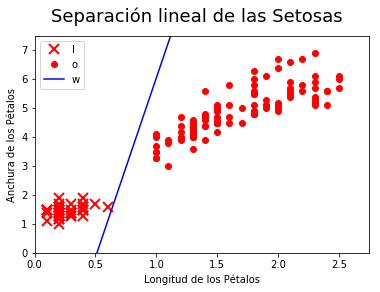

In [48]:
plt.plot(setosa_x, setosa_y, 'rx', ms=10, mew=2, label='Setosa')
plt.plot(no_setosa_x, no_setosa_y, 'ro', label = "No setosa")
plt.plot(x, abline_values, 'b-')
plt.suptitle('Separación lineal de las Setosas', fontsize = 18)
plt.xlabel("Longitud de los Pétalos")
plt.ylabel("Anchura de los Pétalos")
plt.legend("lower right")
plt.xlim([0,2.75])
plt.ylim([0, 7.5])
plt.show()